# Jieba

In [0]:
import jieba

In [0]:
seg_list = jieba.cut("我來到康健人壽上課", HMM=False)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

Full Mode: 我/ 來/ 到/ 康健/ 人/ 壽/ 上/ 課


In [0]:
jieba.add_word('人壽')

In [0]:
seg_list = jieba.cut("我來到康健人壽上課", HMM=False)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

Full Mode: 我/ 來/ 到/ 康健/ 人壽/ 上/ 課


In [0]:
jieba.del_word('T客邦')

In [0]:
seg_list = jieba.cut("我來到康健人壽上課", HMM=False)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

Full Mode: 我/ 來/ 到/ 康健/ 人壽/ 上/ 課


In [0]:
#詞性標註
import jieba.posseg as pseg
words = pseg.cut("今天天氣真好")
for word, flag in words:
    print('%s %s' % (word, flag))
    
#https://gist.github.com/luw2007/6016931

今天 t
天氣 n
真好 d


In [0]:
result = jieba.tokenize(u'亞太智能機器有限公司')
for tk in result:
    print("word %s\t\t start: %d \t\t end:%d" % (tk[0],tk[1],tk[2]))

word 亞太		 start: 0 		 end:2
word 智能		 start: 2 		 end:4
word 機器		 start: 4 		 end:6
word 有限公司		 start: 6 		 end:10


# TF-IDF

In [0]:
#詞袋模型
from sklearn.feature_extraction.text import CountVectorizer
 
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

#文本轉換詞頻矩陣
vectorizer = CountVectorizer()
#計算詞語出現次數
X = vectorizer.fit_transform(corpus)
#文本關鍵字獲取
word = vectorizer.get_feature_names()
print(word)
#檢查結果
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


In [0]:
#TF-IDF
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
#文本轉換詞頻矩陣
vectorizer = CountVectorizer()
#計算詞語出現次數
X = vectorizer.fit_transform(corpus)
#文本關鍵字獲取
word = vectorizer.get_feature_names()
print(word)
#檢查結果
print(X.toarray())
 
from sklearn.feature_extraction.text import TfidfTransformer
 
#功能調用
transformer = TfidfTransformer()
print(transformer)
#將矩陣X轉成TF-IDF值
tfidf = transformer.fit_transform(X)


print (tfidf.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]
TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.27230147 0.         0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]]


In [0]:
#TF-IDF
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    '你 住 的 巷子 裡',
    '我 租了 一間 公寓',
    '爲了 想 與 你 不期而遇',
    '高中 三年',
]
#文本轉換詞頻矩陣
vectorizer = CountVectorizer()
#計算詞語出現次數
X = vectorizer.fit_transform(corpus)
#文本關鍵字獲取
word = vectorizer.get_feature_names()
print(word)
#檢查結果
print(X.toarray())
 
from sklearn.feature_extraction.text import TfidfTransformer
 
#功能調用
transformer = TfidfTransformer()
print(transformer)
#將矩陣X轉成TF-IDF值
tfidf = transformer.fit_transform(X)


print (tfidf.toarray())  

['一間', '三年', '不期而遇', '公寓', '巷子', '爲了', '租了', '高中']
[[0 0 0 0 1 0 0 0]
 [1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0]
 [0 1 0 0 0 0 0 1]]
TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
[[0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.57735027 0.         0.         0.57735027 0.         0.
  0.57735027 0.        ]
 [0.         0.         0.70710678 0.         0.         0.70710678
  0.         0.        ]
 [0.         0.70710678 0.         0.         0.         0.
  0.         0.70710678]]


# Cosine Similarity

In [0]:
def Bag_of_Words(raw_corpus):  
    import jieba
    from sklearn.feature_extraction.text import CountVectorizer
    corpus = [] 
    for x in raw_corpus:
        corpus.append(x)
        #corpus.append(' '.join(jieba.cut(x)))
    vectorizer = CountVectorizer()
    corpus_matrix = vectorizer.fit_transform(corpus)
    return corpus_matrix.toarray()

In [0]:
raw_corpus = ['I work at home', 'I was working at home', 'I was sleeping at home']
x1,x2,x3 = Bag_of_Words(raw_corpus)

In [0]:
def cosine_similarity(x1,x2):    
    import math
    sum_x_and_x, sum_x_and_y, sum_y_and_y = 0, 0, 0
    for i in range(len(x1)):
        x = x1[i]
        y = x2[i]
        sum_x_and_x += x*x
        sum_y_and_y += y*y
        sum_x_and_y += x*y
    return sum_x_and_y/math.sqrt(sum_x_and_x * sum_y_and_y)
print(cosine_similarity(x2,x3))
#Bag_of_Words(raw_corpus)[0]

0.75


In [0]:
print(cosine_similarity(x1,x2))

0.5773502691896258


In [0]:
#作業
text = [
    ["這台車真好我從來不開他"],
    ["這台手機真好我從來不用他"],
    ["這台機車真好我從來不騎他"],
    ["這碗咖哩飯真好吃我經常來吃", ],
    ["這碗義大利麵真好吃我經常來餐廳吃"],
    ["這台車真好開我經常開出門"],
]

text

[['這台車真好我從來不開他'],
 ['這台手機真好我從來不用他'],
 ['這台機車真好我從來不騎他'],
 ['這碗咖哩飯真好吃我經常來吃'],
 ['這碗義大利麵真好吃我經常來餐廳吃'],
 ['這台車真好開我經常開出門']]

In [0]:
#請問 這台機車真好我從來不騎他 的 這碗咖哩飯真好吃我經常來吃 的關係

# Word2vec

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
!pip install tensorflow==2.0.0-rc0 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [0]:
tf.__version__

'2.0.0-rc0'

In [0]:
# 資料匯入
# 25,000電影評論情緒資料（正面與負面）
vocab_size = 10000
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

In [0]:
#以下展示的數字為字典中的特定單詞
print(train_data[1])

[   1  194 1153  194 8255   78  228    5    6 1463 4369 5012  134   26
    4  715    8  118 1634   14  394   20   13  119  954  189  102    5
  207  110 3103   21   14   69  188    8   30   23    7    4  249  126
   93    4  114    9 2300 1523    5  647    4  116    9   35 8163    4
  229    9  340 1322    4  118    9    4  130 4901   19    4 1002    5
   89   29  952   46   37    4  455    9   45   43   38 1543 1905  398
    4 1649   26 6853    5  163   11 3215    2    4 1153    9  194  775
    7 8255    2  349 2637  148  605    2 8003   15  123  125   68    2
 6853   15  349  165 4362   98    5    4  228    9   43    2 1157   15
  299  120    5  120  174   11  220  175  136   50    9 4373  228 8255
    5    2  656  245 2350    5    4 9837  131  152  491   18    2   32
 7464 1212   14    9    6  371   78   22  625   64 1382    9    8  168
  145   23    4 1690   15   16    4 1355    5   28    6   52  154  462
   33   89   78  285   16  145   95    0    0    0    0    0    0    0
    0 

In [0]:
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0 #填充長度不一的內容
word_index["<START>"] = 1 #開始的代號
word_index["<UNK>"] = 2   # 詞彙表沒有的詞，如人名
word_index["<UNUSED>"] = 3 #沒用到的詞

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
#透過pad_sequences來將電影的評論進行長度的標準化
maxlen = 500

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=maxlen)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlen)

In [0]:
embedding_dim=16

model = keras.Sequential([
  #第一層採用Embedding（單詞的範圍大小、Embedding向量的維度、單一句子的最大長度）
  layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
  #對字串做最大池化
  layers.GlobalAveragePooling1D(),
  #建立16顆神經單元的輸出
  layers.Dense(16, activation='relu'),
  #建立1顆神經單元的輸出，並使用0~1間的激活函數，確保輸出為機率的範圍
  layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    train_labels,
    epochs=30,
    batch_size=512,
    validation_data=(test_data, test_labels))

W0824 08:58:18.508578 140460605884288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 [==============================] - 3s 130us/sample - loss: 0.6922 - accuracy: 0.5717 - val_loss: 0.6907 - val_accuracy: 0.6168
Epoch 2/30
25000/25000 [==============================] - 2s 97us/sample - loss: 0.6867 - accuracy: 0.6715 - val_loss: 0.6816 - val_accuracy: 0.7119
Epoch 3/30
25000/25000 [==============================] - 2s 97us/sample - loss: 0.6687 - accuracy: 0.7242 - val_loss: 0.6567 - val_accuracy: 0.7526
Epoch 4/30
25000/25000 [==============================] - 2s 96us/sample - loss: 0.6297 - accuracy: 0.7727 - val_loss: 0.6093 - val_accuracy: 0.7790
Epoch 5/30
25000/25000 [==============================] - 2s 96us/sample - loss: 0.5706 - accuracy: 0.8043 - val_loss: 0.5516 - val_accuracy: 0.8057
Epoch 6/30
25000/25000 [==============================] - 2s 97us/sample - loss: 0.5066 - accuracy: 0.8318 - val_loss: 0.4959 - val_accuracy: 0.8235
Epoch 7/30
25000/25000 [==============================]

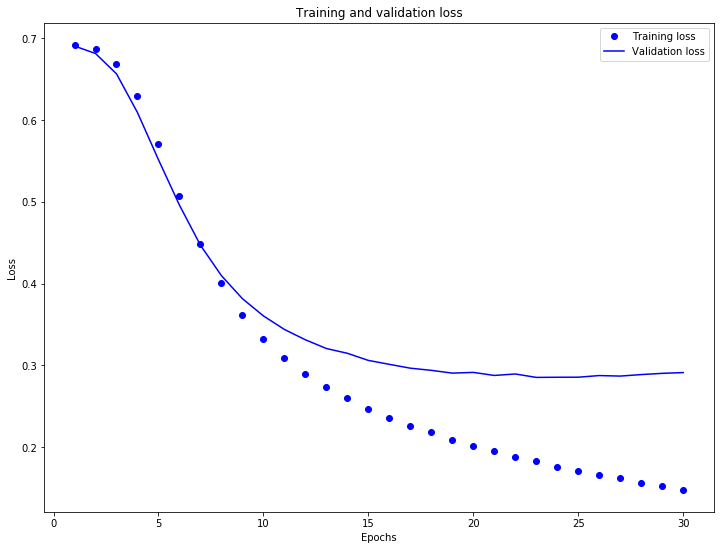

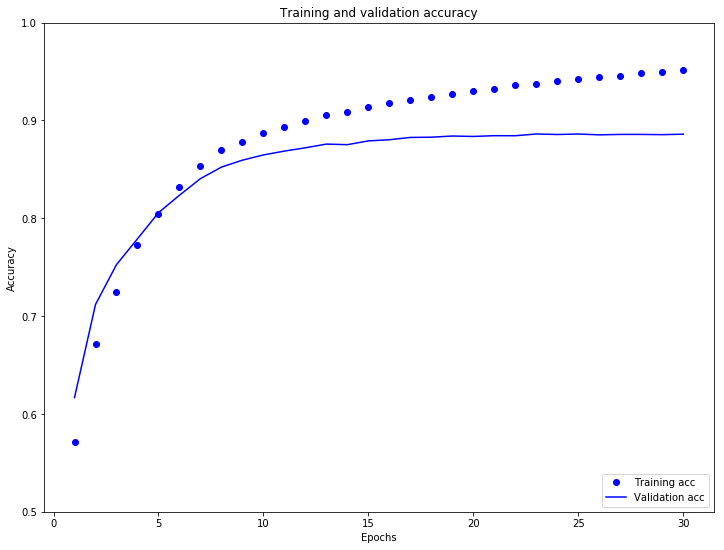

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)
#10000為詞彙表，16為詞向量維度

(10000, 16)


In [0]:
import io

#vecs.tsv向量文件（16個維度）
#meta.tsv單詞文件（10000個單詞）

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [0]:
#http://projector.tensorflow.org/

In [0]:
#嘗試輸入beautiful
#嘗試刪除Dense(16) layer 試試看

# elmo in Tensorflow Hub

In [0]:
# https://tfhub.dev/google/elmo/2
!pip install "tensorflow_hub==0.4.0"
!pip install "tf-nightly"
import tensorflow as tf
import tensorflow_hub as hub

W0824 10:19:06.556741 140274628392832 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [0]:
#'1.15.0-dev20190821'
tf.__version__

'1.15.0-dev20190821'

In [0]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
embeddings = elmo(
    ["the cat is on the mat", "dogs are in the fog"],
    signature="default",
    as_dict=True)["elmo"]


In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print(sess.run([embeddings]))

[array([[[ 3.0815446e-01,  2.6630378e-01,  2.3561318e-01, ...,
         -3.7085700e-01,  1.6490485e-01, -7.2459400e-02],
        [ 5.1428747e-01, -1.3532342e-01,  1.1090420e-01, ...,
          4.0468417e-02, -4.7897615e-02,  7.3659599e-01],
        [-2.5880523e-02, -7.2836205e-02, -7.9355910e-02, ...,
         -2.9072449e-01,  7.2421384e-01,  4.3863493e-01],
        [-3.4798056e-01, -2.9102534e-02, -8.1993049e-01, ...,
         -9.2048419e-01,  2.1887727e-02,  1.2106007e-01],
        [-2.1827470e-01, -1.3076583e-01, -2.5209606e-01, ...,
         -2.9693565e-01, -1.5828055e-01, -4.9007621e-02],
        [ 1.0072546e-01, -2.9534407e-02, -2.4494278e-01, ...,
         -3.7235114e-01, -1.4875799e-01,  2.1592233e-01]],

       [[ 5.4578602e-02, -2.6427537e-01,  4.6843791e-01, ...,
         -1.4077078e-01, -2.6568234e-01,  4.5212010e-01],
        [ 8.0942839e-02,  1.1583914e-01, -1.5670604e-01, ...,
         -2.6896149e-01,  3.3871955e-01,  1.1577109e-02],
        [-7.8964338e-02,  9.4927549e-

In [0]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
tokens_input = [["the", "cat", "is", "on", "the", "mat"],
                ["dogs", "are", "in", "the", "fog", ""]]
tokens_length = [6, 5]
embeddings = elmo(
    inputs={
        "tokens": tokens_input,
        "sequence_len": tokens_length
    },
    signature="tokens",
    as_dict=True)["elmo"]

# elmo

In [0]:
#!pip install tensorflow=='1.14.0'
#!pip install "tensorflow_hub==0.4.0"

     |████████████████████████████████| 81kB 3.8MB/s 
  Found existing installation: tensorflow-hub 0.5.0
    Uninstalling tensorflow-hub-0.5.0:
      Successfully uninstalled tensorflow-hub-0.5.0


In [0]:
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import os
import re
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from keras.engine import Layer
import numpy as np

Using TensorFlow backend.


In [0]:
# Load all files from a directory in a DataFrame.
def load_directory_data(directory):
  data = {}
  data["sentence"] = []
  data["sentiment"] = []
  for file_path in os.listdir(directory):
    with tf.gfile.GFile(os.path.join(directory, file_path), "r") as f:
      data["sentence"].append(f.read())
      data["sentiment"].append(re.match("\d+_(\d+)\.txt", file_path).group(1))
  return pd.DataFrame.from_dict(data)

# Merge positive and negative examples, add a polarity column and shuffle.
def load_dataset(directory):
  pos_df = load_directory_data(os.path.join(directory, "pos"))
  neg_df = load_directory_data(os.path.join(directory, "neg"))
  pos_df["polarity"] = 1
  neg_df["polarity"] = 0
  return pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)

# Download and process the dataset files.
def download_and_load_datasets(force_download=False):
  dataset = tf.keras.utils.get_file(
      fname="aclImdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

  train_df = load_dataset(os.path.join(os.path.dirname(dataset), 
                                       "aclImdb", "train"))
  test_df = load_dataset(os.path.join(os.path.dirname(dataset), 
                                      "aclImdb", "test"))

  return train_df, test_df

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

train_df, test_df = download_and_load_datasets()
train_df.head()

,sentence,sentiment,polarity
0,There are two movie experiences I will always ...,10,1
1,I saw this film by chance on the small box. It...,8,1
2,I never thought an old cartoon would bring tea...,8,1
3,I desperately want to give this movie a 10...I...,1,0
4,Expecting a combination of scifi and period fi...,2,0


In [0]:
class ElmoEmbeddingLayer(Layer):
    def __init__(self, **kwargs):
        self.dimensions = 1024
        self.trainable=True
        super(ElmoEmbeddingLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.elmo = hub.Module('https://tfhub.dev/google/elmo/2', trainable=self.trainable,
                               name="{}_module".format(self.name))

        self.trainable_weights += K.tf.trainable_variables(scope="^{}_module/.*".format(self.name))
        super(ElmoEmbeddingLayer, self).build(input_shape)

    def call(self, x, mask=None):
        result = self.elmo(K.squeeze(K.cast(x, tf.string), axis=1),
                      as_dict=True,
                      signature='default',
                      )['default']
        return result

    def compute_mask(self, inputs, mask=None):
        return K.not_equal(inputs, '--PAD--')

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dimensions)


In [0]:
def build_model(): 
  input_text = layers.Input(shape=(1,), dtype="string")
  embedding = ElmoEmbeddingLayer()(input_text)
  dense = layers.Dense(256, activation='relu')(embedding)
  pred = layers.Dense(1, activation='sigmoid')(dense)

  model = Model(inputs=[input_text], outputs=pred)

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  return model

In [0]:
train_text = train_df['sentence'].tolist()
train_text = [' '.join(t.split()[0:150]) for t in train_text]
train_text = np.array(train_text, dtype=object)[:, np.newaxis]
train_label = train_df['polarity'].tolist()

test_text = test_df['sentence'].tolist()
test_text = [' '.join(t.split()[0:150]) for t in test_text]
test_text = np.array(test_text, dtype=object)[:, np.newaxis]
test_label = test_df['polarity'].tolist()

In [0]:
model = build_model()
model.fit(train_text, 
          train_label,
          validation_data=(test_text, test_label),
          epochs=1,
          batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
elmo_embedding_layer_1 (Elmo (None, 1024)              4         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 262,661
Trainable params: 262,661
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
   96/25000 [..............................] - ETA: 6:18:53 - loss: 0.7229 - acc: 0.4896

E0824 10:22:04.139858 140274628392832 ultratb.py:152] Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-002c8a64f733>", line 6, in <module>
    batch_size=32)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1039, in fit
    validation_steps=validation_steps)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_arrays.py", line 199, in fit_loop
    outs = f(ins_batch)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2715, in __call__
    return self._call(inputs)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2675, in _call
    fetched = self._callable_fn(*array_vals)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py", line 1472, in __call__
    run_metadata_ptr)
KeyboardInterrupt

During handling of the ab

KeyboardInterrupt: ignored

In [0]:
post_save_preds = model.predict(test_text[0:3])
post_save_preds